In [1]:
#清洗数据
import pandas as pd
import datetime


# 读取CSV文件
file_path = 'Books_rating.csv'
df = pd.read_csv(file_path, encoding='utf-8')

# 删除指定列
df = df.drop(columns=['Price'])

# 确保 review/helpfulness 列为字符串格式
df['review/helpfulness'] = df['review/helpfulness'].astype(str)

# 删除包含空数据的行
df.dropna(inplace=True)

# 定义一个转换函数，处理异常
def convert_timestamp(ts):
    try:
        return datetime.datetime.fromtimestamp(int(ts)).strftime('%Y/%m/%d')
    except (ValueError, OSError):
        return None  # 如果出现错误，返回None

# 转换 review/time 列中的 Unix 时间戳
df['review/time'] = df['review/time'].apply(convert_timestamp)

# 删除转换后仍为 None 的行
df.dropna(subset=['review/time'], inplace=True)

# 保存为新的CSV文件
df.to_csv('Cleaned_Books_rating.csv', index=False,encoding='utf-8')
print("数据清洗完成")

数据清洗完成


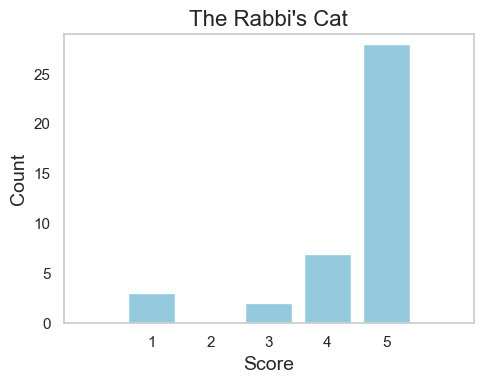

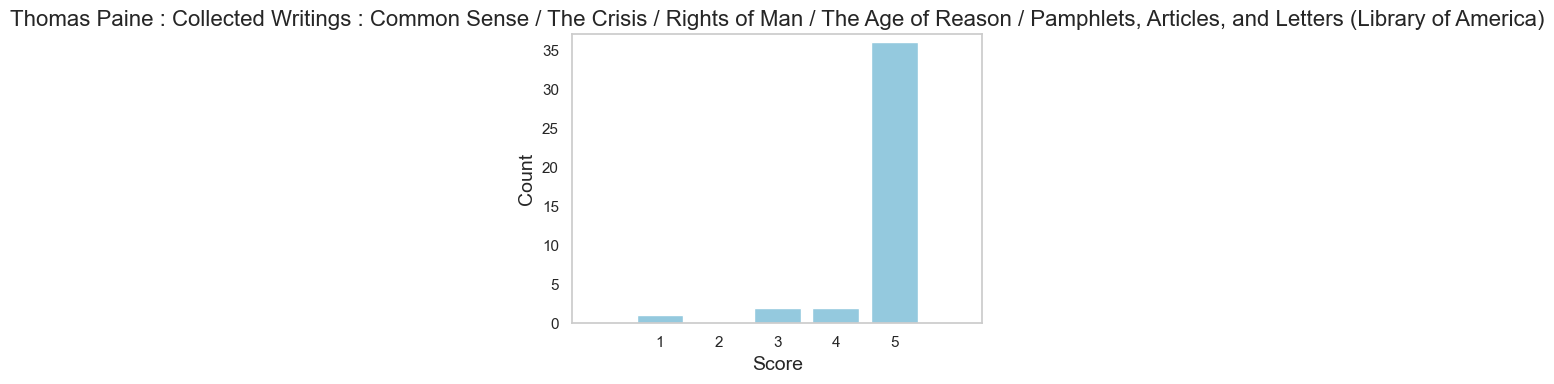

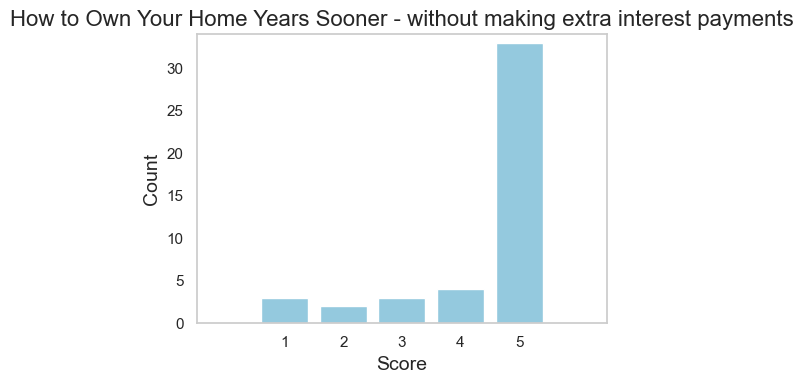

In [6]:
#评分分布可视化 前三本书
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re  # 导入正则表达式库

# 设置图表风格
sns.set(style='whitegrid')

# 读取CSV文件
file_path = 'Cleaned_Books_rating.csv'
df = pd.read_csv(file_path, encoding='utf-8')

# 选择数据集中的前三本书（不基于评论数）
top_books = df['Title'].unique()[:3]  # 取前3本书的书名
filtered_df = df[df['Title'].isin(top_books)].copy()  # 使用 .copy()

# 将评分列转换为整数
filtered_df.loc[:, 'review/score'] = filtered_df['review/score'].astype(int)

# 为每本书绘制评分分布图
for book_title in top_books:
    plt.figure(figsize=(5, 4))  # 创建新的图形
    book_data = filtered_df[filtered_df['Title'] == book_title]

    # 创建一个完整的评分范围
    score_counts = book_data['review/score'].value_counts().reindex(range(0, 7), fill_value=0)

    # 绘制评分分布图
    sns.barplot(x=score_counts.index, y=score_counts.values, color='skyblue')

    # 添加标题和标签
    plt.title(book_title, fontsize=16)
    plt.xlabel('Score', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(range(1, 6))  # 设置x轴刻度从1到5

    # 设置y轴最小值为0
    plt.ylim(0, score_counts.max() + 1)

    # 添加网格线
    plt.grid(axis='y')

    # 显示图表
    plt.tight_layout()

    # 处理文件名，替换不允许的字符
    safe_book_title = re.sub(r'[<>:"/\\|?*]', '-', book_title)  # 替换不允许的字符
    plt.savefig(f'Rating_Distribution_{safe_book_title}.png', bbox_inches='tight', dpi=300)  # 增加DPI

    # 显示图表
    plt.show()  # 按顺序显示每张图


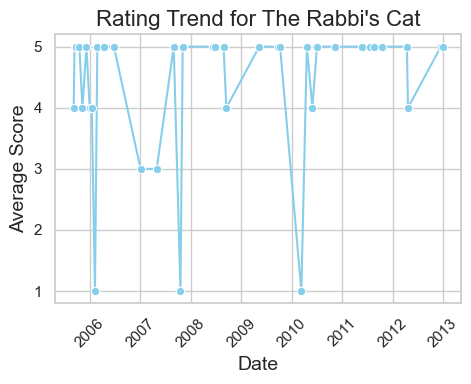

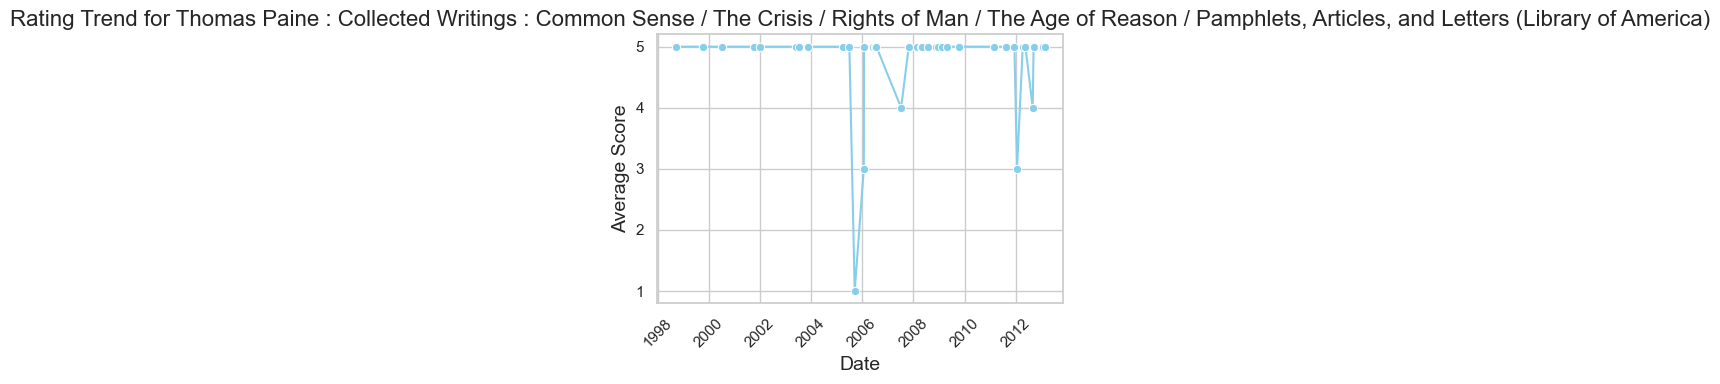

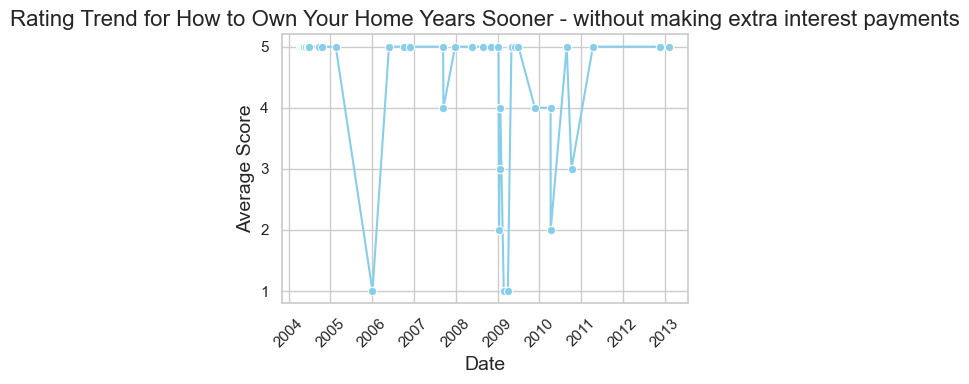

In [7]:
#评分随时间变化的趋势图 前三本书
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re  # 导入正则表达式库

# 设置图表风格
sns.set(style='whitegrid')

# 读取CSV文件
file_path = 'Cleaned_Books_rating.csv'
df = pd.read_csv(file_path, encoding='utf-8')

# 将时间列转换为日期格式（假设时间列名为'review/time'）
df['review/time'] = pd.to_datetime(df['review/time'], format='%Y/%m/%d')

# 选择数据集中的前三本书（不基于评论数）
top_books = df['Title'].unique()[:3]  # 取前3本书的书名

# 为每本书绘制评分随时间变化的趋势图
for book_title in top_books:
    plt.figure(figsize=(5, 4))  # 创建新的图形
    book_data = df[df['Title'] == book_title]

    # 按时间聚合评分数据
    trend_data = book_data.groupby('review/time').agg({'review/score': 'mean'}).reset_index()

    # 绘制趋势图
    sns.lineplot(data=trend_data, x='review/time', y='review/score', marker='o', color='skyblue')

    # 添加标题和标签
    plt.title(f'Rating Trend for {book_title}', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Average Score', fontsize=14)

    # 格式化x轴日期
    plt.xticks(rotation=45)

    # 显示图表
    plt.tight_layout()

    # 处理文件名，替换不允许的字符
    safe_book_title = re.sub(r'[<>:"/\\|?*]', '-', book_title)  # 替换不允许的字符
    plt.savefig(f'Rating_Trend_{safe_book_title}.png', bbox_inches='tight', dpi=300)  # 增加DPI

    # 显示图表
    plt.show()  # 按顺序显示每张图


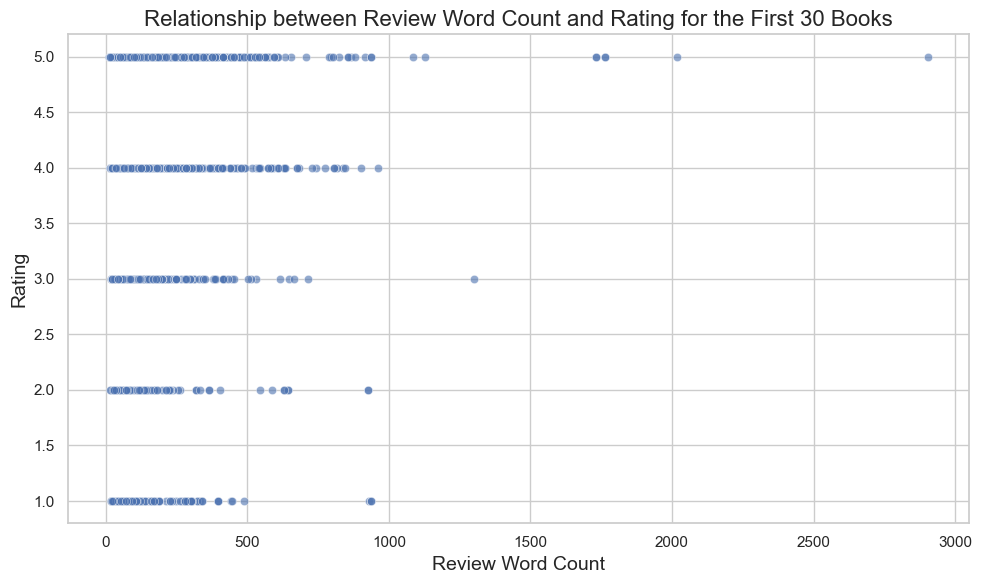

In [8]:
#评论词数与评分的关系可视化 前三十本书
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os  # 导入os库以处理文件路径

# 设置图表风格
sns.set(style='whitegrid')

# 读取CSV文件
file_path = 'Cleaned_Books_rating.csv'
df = pd.read_csv(file_path, encoding='utf-8')

# 选择数据集中的前三十本书
top_books = df['Title'].unique()[:30]  # 取前30本书的书名
filtered_df = df[df['Title'].isin(top_books)].copy()  # 使用 .copy()

# 计算评论词数
filtered_df['review/word_count'] = filtered_df['review/text'].apply(lambda x: len(str(x).split()))

# 绘制散点图
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='review/word_count', y='review/score', alpha=0.6)

# 添加标题和标签
plt.title('Relationship between Review Word Count and Rating for the First 30 Books', fontsize=16)
plt.xlabel('Review Word Count', fontsize=14)
plt.ylabel('Rating', fontsize=14)

# 保存图表到当前目录
current_directory = os.getcwd()  # 获取当前工作目录
plt.savefig(os.path.join(current_directory, 'Review_Word_Count_vs_Rating.png'), bbox_inches='tight', dpi=300)

# 显示图表
plt.tight_layout()
plt.show()
